<ipython-input-6-64065a9a7420>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Value'].fillna(df['Value'].mean(), inplace=True)


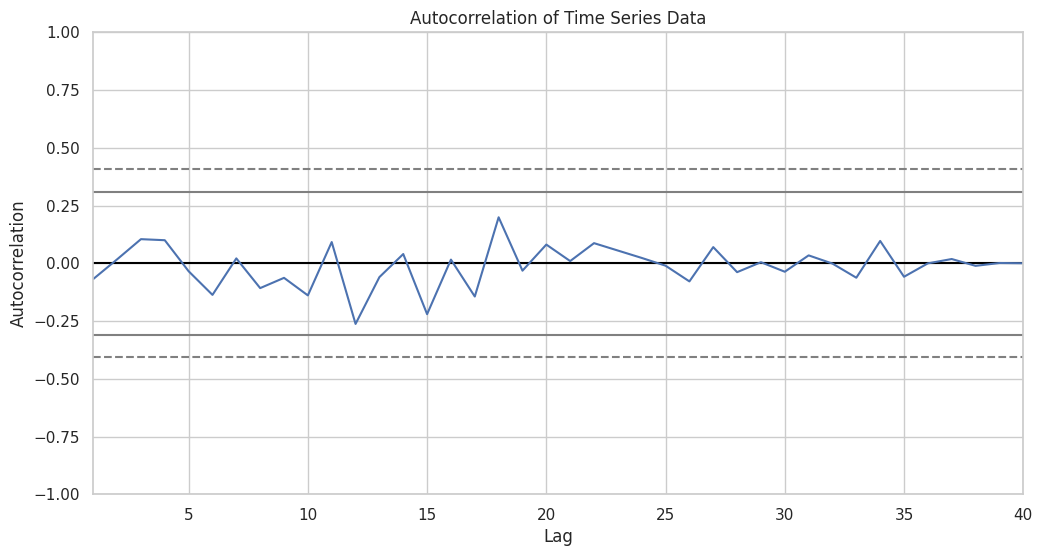

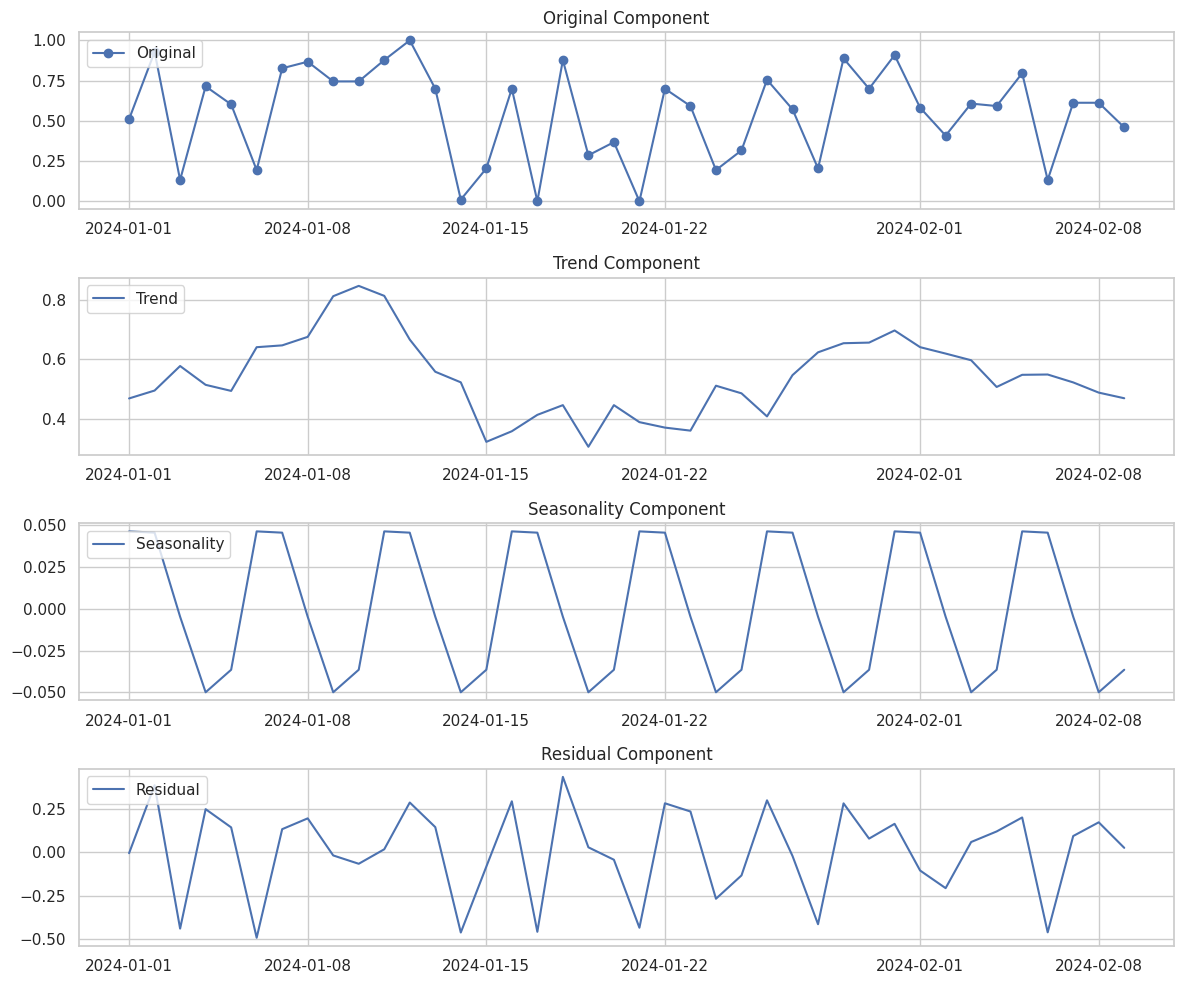

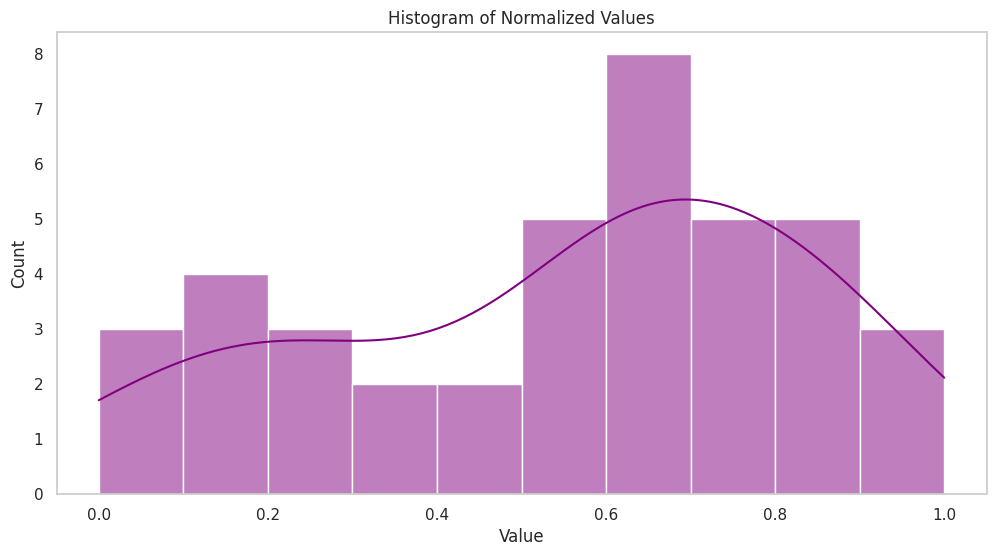

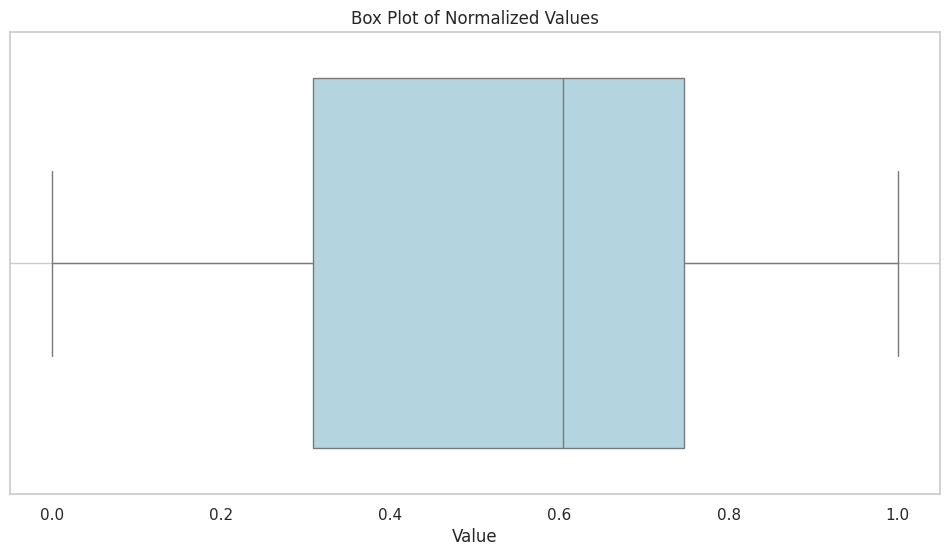

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

# Set random seed and seaborn style
np.random.seed(42)
sns.set(style="whitegrid")

# Generate random time series data (40 samples)
n_samples = 40
dates = pd.date_range(start='2024-01-01', periods=n_samples, freq='D')
data = np.random.randint(50, 150, size=n_samples).astype(float)

# Introduce missing values and an outlier
data[np.random.choice(n_samples, size=4, replace=False)] = np.nan
data[np.random.randint(0, n_samples)] *= 5

# Create DataFrame and handle missing values and outliers
df = pd.DataFrame({'Date': dates, 'Value': data})
df['Value'].fillna(df['Value'].mean(), inplace=True)
df['Value'] = np.where(df['Value'] > df['Value'].quantile(0.99), df['Value'].median(), df['Value'])

# Normalize and smooth data
df['Value'] = (df['Value'] - df['Value'].min()) / (df['Value'].max() - df['Value'].min())
df['Smoothed_Value'] = df['Value'].rolling(window=5, min_periods=1).mean()

# Visualization: Autocorrelation Plot
plt.figure(figsize=(12, 6))
autocorrelation_plot(df['Value'])
plt.title('Autocorrelation of Time Series Data')
plt.grid()
plt.show()

# Visualization: Time Series Decomposition
decomposition = seasonal_decompose(df['Value'], period=5, model='additive', extrapolate_trend='freq')
plt.figure(figsize=(12, 10))

for i, (component, title) in enumerate(zip([df['Value'], decomposition.trend, decomposition.seasonal, decomposition.resid],
                                            ['Original', 'Trend', 'Seasonality', 'Residual']), 1):
    plt.subplot(4, 1, i)
    plt.plot(df['Date'], component, label=title, marker='o' if i == 1 else None)
    plt.title(f'{title} Component')
    plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Additional Visualizations: Histogram and Box Plot
plt.figure(figsize=(12, 6))
sns.histplot(df['Value'], bins=10, kde=True, color='purple')
plt.title('Histogram of Normalized Values')
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Value'], color='lightblue')
plt.title('Box Plot of Normalized Values')
plt.grid()
plt.show()